# CLASSIFYING MOVIE REVIEWS: A BINARY CLASSIFICATION EXAMPLE

## Loading the IMDB dataset

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


17465344/17464789 [==============================] - 3s 0us/step


In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [7]:
# Quickly decode of one of these reviews back to English words

word_index = imdb.get_word_index() # word_index is a dictionary mapping words to an integer index.
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]) # Reverses it, mapping integer indices to words
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]) # Decodes the review.
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

## Preparing the Data

In [0]:
# Encoding the integer sequences into a binary matrix

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Creates an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        # Sets specific indices of results[i] to 1s
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data) # Vectorized training data
x_test = vectorize_sequences(test_data) # Vectorized test data

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
# Vectorizing the labels

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [11]:
y_train[0]

1.0

## Building the Network

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
# First hidden layer -> relu activation
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
# Second hidden layer -> relu activation
model.add(layers.Dense(16, activation='relu'))
# Output layer -> sigmoid activation (value between 0 and T1)
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
# Compiling the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
# Configuring the optimizer
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
# Using custom losses and metrics
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

## Validating the approach

In [0]:
# Validation set to monitor the accuracy of the model to data 
# it's never seen before during the training
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [17]:
# Training the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 197us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - val_ac

15000/15000 [==============================] - 1s 97us/step - loss: 0.0661 - acc: 0.9821 - val_loss: 0.3635 - val_acc: 0.8782
Epoch 10/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.0561 - acc: 0.9853 - val_loss: 0.3843 - val_acc: 0.8792
Epoch 11/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.0439 - acc: 0.9893 - val_loss: 0.4153 - val_acc: 0.8779
Epoch 12/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.0381 - acc: 0.9921 - val_loss: 0.4525 - val_acc: 0.8690
Epoch 13/20
15000/15000 [==============================] - 2s 100us/step - loss: 0.0300 - acc: 0.9928 - val_loss: 0.4698 - val_acc: 0.8729
Epoch 14/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.0247 - acc: 0.9945 - val_loss: 0.5023 - val_acc: 0.8726
Epoch 15/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.0175 - acc: 0.9979 - val_loss: 0.5342 - val_acc: 0.8693
Epoch 16/20
15000/15000 [====================

15000/15000 [==============================] - 1s 99us/step - loss: 0.0075 - acc: 0.9996 - val_loss: 0.6822 - val_acc: 0.8632
Epoch 19/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.0121 - acc: 0.9971 - val_loss: 0.6771 - val_acc: 0.8651
Epoch 20/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.0041 - acc: 0.9999 - val_loss: 0.6900 - val_acc: 0.8657


In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

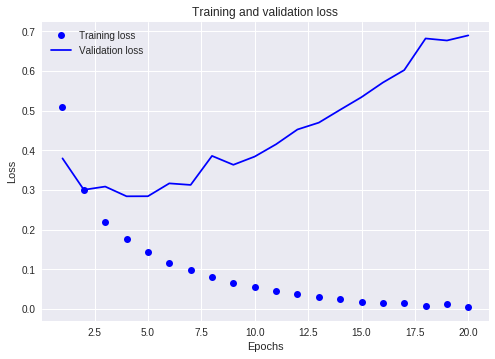

In [20]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') # “bo” is for “blue dot.”
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') # “b” is for “solid blue line.”
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

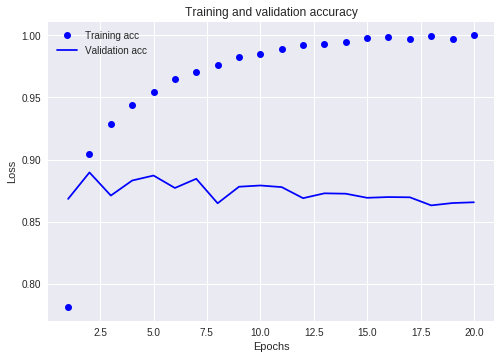

In [22]:
# Plotting the training and validation accuracy
plt.clf() # clears the figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [26]:
# Retraining a model from scratch

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 69us/step - loss: 0.4584 - acc: 0.8133
Epoch 2/4
25000/25000 [==============================] - 2s 62us/step - loss: 0.2630 - acc: 0.9095
Epoch 3/4
25000/25000 [==============================] - 2s 63us/step - loss: 0.2005 - acc: 0.9282
Epoch 4/4
25000/25000 [==============================] - 4s 140us/step


In [27]:
# Final result
results # Accuracy of 88% on test data

[0.29884498374938967, 0.88256]

## Generating predictions on new data

In [28]:
model.predict(x_test)

array([[0.21053138],
       [0.99948835],
       [0.9289998 ],
       ...,
       [0.14233981],
       [0.10365896],
       [0.7072803 ]], dtype=float32)

## Further Experiments

### Using only one hidden layer

In [29]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=512,
                    validation_data=(x_val, y_val))
model.evaluate(x_test, y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 2s 114us/step - loss: 0.4915 - acc: 0.7965 - val_loss: 0.3798 - val_acc: 0.8751
Epoch 2/5
15000/15000 [==============================] - 2s 101us/step - loss: 0.3105 - acc: 0.9043 - val_loss: 0.3203 - val_acc: 0.8799
Epoch 3/5
15000/15000 [==============================] - 2s 101us/step - loss: 0.2396 - acc: 0.9258 - val_loss: 0.3005 - val_acc: 0.8806
Epoch 4/5
15000/15000 [==============================] - 2s 102us/step - loss: 0.1976 - acc: 0.9391 - val_loss: 0.2795 - val_acc: 0.8908
Epoch 5/5
25000/25000 [==============================] - 3s 135us/step


[0.29615624000072477, 0.88044]

### Using three hidden layers

In [30]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=512,
                    validation_data=(x_val, y_val))
model.evaluate(x_test, y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 2s 123us/step - loss: 0.5622 - acc: 0.7572 - val_loss: 0.4176 - val_acc: 0.8603
Epoch 2/5
15000/15000 [==============================] - 2s 104us/step - loss: 0.3112 - acc: 0.9031 - val_loss: 0.2999 - val_acc: 0.8875
Epoch 3/5
15000/15000 [==============================] - 2s 104us/step - loss: 0.2189 - acc: 0.9273 - val_loss: 0.2773 - val_acc: 0.8911
Epoch 4/5
15000/15000 [==============================] - 2s 103us/step - loss: 0.1727 - acc: 0.9407 - val_loss: 0.2829 - val_acc: 0.8873
Epoch 5/5
25000/25000 [==============================] - 3s 138us/step


[0.3193832802963257, 0.87504]

### Using hidden layers with more hidden units

In [31]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=512,
                    validation_data=(x_val, y_val))
model.evaluate(x_test, y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 2s 123us/step - loss: 0.5009 - acc: 0.7542 - val_loss: 0.3599 - val_acc: 0.8526
Epoch 2/5
15000/15000 [==============================] - 2s 102us/step - loss: 0.2729 - acc: 0.8942 - val_loss: 0.2794 - val_acc: 0.8884
Epoch 3/5
15000/15000 [==============================] - 2s 102us/step - loss: 0.1869 - acc: 0.9321 - val_loss: 0.3188 - val_acc: 0.8778
Epoch 4/5
15000/15000 [==============================] - 2s 101us/step - loss: 0.1515 - acc: 0.9429 - val_loss: 0.3100 - val_acc: 0.8796
Epoch 5/5
25000/25000 [==============================] - 3s 138us/step


[0.35138606275081635, 0.87216]

In [33]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=512,
                    validation_data=(x_val, y_val))
model.evaluate(x_test, y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 2s 132us/step - loss: 0.5108 - acc: 0.7632 - val_loss: 0.3099 - val_acc: 0.8836
Epoch 2/5
15000/15000 [==============================] - 2s 107us/step - loss: 0.2683 - acc: 0.8967 - val_loss: 0.2849 - val_acc: 0.8865
Epoch 3/5
15000/15000 [==============================] - 2s 106us/step - loss: 0.1805 - acc: 0.9305 - val_loss: 0.2921 - val_acc: 0.8836
Epoch 4/5
15000/15000 [==============================] - 2s 103us/step - loss: 0.1365 - acc: 0.9487 - val_loss: 0.2890 - val_acc: 0.8812
Epoch 5/5
25000/25000 [==============================] - 4s 140us/step


[0.3727421020078659, 0.87424]

### Using mse loss

In [34]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=512,
                    validation_data=(x_val, y_val))
model.evaluate(x_test, y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 2s 116us/step - loss: 0.1818 - acc: 0.7788 - val_loss: 0.1332 - val_acc: 0.8518
Epoch 2/5
15000/15000 [==============================] - 1s 95us/step - loss: 0.1007 - acc: 0.9012 - val_loss: 0.0977 - val_acc: 0.8860
Epoch 3/5
15000/15000 [==============================] - 1s 98us/step - loss: 0.0701 - acc: 0.9264 - val_loss: 0.0871 - val_acc: 0.8898
Epoch 4/5
15000/15000 [==============================] - 1s 97us/step - loss: 0.0541 - acc: 0.9421 - val_loss: 0.0840 - val_acc: 0.8918
Epoch 5/5
25000/25000 [==============================] - 3s 135us/step


[0.0891018616271019, 0.87992]

### Using tanh activation

In [35]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=512,
                    validation_data=(x_val, y_val))
model.evaluate(x_test, y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 2s 120us/step - loss: 0.4868 - acc: 0.8007 - val_loss: 0.3607 - val_acc: 0.8712
Epoch 2/5
15000/15000 [==============================] - 1s 96us/step - loss: 0.2784 - acc: 0.9070 - val_loss: 0.2848 - val_acc: 0.8935
Epoch 3/5
15000/15000 [==============================] - 1s 97us/step - loss: 0.1972 - acc: 0.9335 - val_loss: 0.2794 - val_acc: 0.8862
Epoch 4/5
15000/15000 [==============================] - 1s 97us/step - loss: 0.1463 - acc: 0.9514 - val_loss: 0.2961 - val_acc: 0.8814
Epoch 5/5
25000/25000 [==============================] - 3s 139us/step


[0.3298256318664551, 0.87392]